In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
print (__version__) # requires version >= 1.9.0


init_notebook_mode(connected=True)

2.7.0


In [2]:
data = None
with open( "./scraped_17128.txt" , "r") as f:
    data = f.read()

In [3]:
len(data)

53684166

In [4]:
df = pd.read_json( data )

In [5]:
df.shape

(17128, 98)

In [6]:
for f in df.columns:
    print( f)

Address
AdministrationPrice
AdvertCategoryId
AdvertExternalId
AdvertId
AdvertType
AdvertWASId
Advertising
AgeId
Ages
Area
Baths
Capacity
Category1
Category1Id
Category2
Category2Id
Category3
Category3Id
ClientId
ClientLogoURL
ClientName
ClientParentLevel
ClientURL
Condition
ConditionId
ContractType
DeliveryDate
Description
Email1
Email2
Email3
Extras
ExtrasId
Financing
Floor
FloorId
FormatedLivingArea
FormatedPrice
FormatedPriceM2
FormatedSurface
Garages
GaragesId
GridDate
GroupName
GroupType
IncludesAdministration
InteriorFloors
Keywords
Latitude
LivingArea
Location1
Location1Id
Location2
Location2Id
Location3
Location3Id
Location4
Location4Id
LocationType
Longitude
ModifyDate
Neighborhood
NumPhotos
NumVideos
OriginId
OutStanding
ParentLevel
Phone
Phone2
Phone3
PhoneClickToCall
PhoneWhatsApp
PhotoUrl
Price
PriceM2
PriceType
PriceTypeId
ProductLabel
ProductsCode
PromotionLogoURL
QualityRate
Rooms
Schedule
SemanticText
Status
Stratum
StratumId
Surface
Title
TopAdvert
TotalEnvironment
Tr

In [7]:
df[ "FormatedPrice"].tail(10)

17118    $ 630.000.000
17119    $ 430.000.000
17120    $ 130.000.000
17121    $ 790.000.000
17122    $ 250.000.000
17123    $ 387.000.000
17124    $ 295.000.000
17125    $ 939.000.000
17126    $ 225.000.000
17127    $ 660.000.000
Name: FormatedPrice, dtype: object

In [8]:
df["FormatedPrice"] = df["FormatedPrice"].apply( lambda x : x.replace("$" , "" )  )
df["FormatedPrice"] = df["FormatedPrice"].apply( lambda x : x.replace("." , "" )  )
#df["FormatedPrice"] = df["FormatedPrice"].apply( lambda x : float(x) )

In [9]:
df["FormatedPrice"] = pd.to_numeric( df["FormatedPrice"] , errors = "coerce")

In [10]:
df = df.dropna( subset =["FormatedPrice"])

In [11]:
df = df.sort_values( by = "FormatedPrice" , ascending = True).reset_index()

In [12]:
df["Price"].head()

0     430000
1     950000
2    1190000
3    1700000
4    2872000
Name: Price, dtype: int64

In [13]:
df["FormatedPrice"].head()

0     430000.0
1     950000.0
2    1190000.0
3    1700000.0
4    2872000.0
Name: FormatedPrice, dtype: float64

In [14]:
df.head()

,index,Address,AdministrationPrice,AdvertCategoryId,AdvertExternalId,AdvertId,AdvertType,AdvertWASId,Advertising,AgeId,...,Surface,Title,TopAdvert,TotalEnvironment,TransactionId,TransactionType,ViewMapType,ViewMapTypeId,Weather,WeatherId
0,15575,Carrera 13Bis 109 - 11,450000,2,,3673486,Used,3673486,,2,...,68,Apartamento en Venta - Bogotá Santa Paula,0,0,1,Venta,,1,,0
1,1039,CL 7 A BIS 79 35,0,2,,3970500,Used,3970500,,4,...,60,Apartamento en Venta - Bogotá Castilla,0,0,1,Venta,,3,,0
2,5042,SANTA BARBARA CARRERA 10A # 119 -70 APTO 502,1496803,2,VEN-8801,3610084,Used,3610084,,4,...,259,Apartamento en Venta - Bogotá SANTA BARBARA,0,0,1,Venta,,3,,0
3,16878,Calle 81 8-42,980000,2,Apto Natalie,3921297,Used,3921297,,2,...,175,Apartamento en Venta - Bogotá La Cabrera,0,0,1,Venta,,1,,0
4,8903,El Nogal Calle 76 # 8 - 50,1781700,2,VEN-103275,3939455,Used,3939455,,5,...,429,Apartamento en Venta - Bogotá El Nogal,0,0,1,Venta,,3,,0


In [15]:
df["FormatedPrice"].head()

0     430000.0
1     950000.0
2    1190000.0
3    1700000.0
4    2872000.0
Name: FormatedPrice, dtype: float64

In [16]:
df["Price"].head()

0     430000
1     950000
2    1190000
3    1700000
4    2872000
Name: Price, dtype: int64

In [17]:
df.head()
df["Location3"] = df["Location3"].apply( lambda x : x.replace("Zona",""))

In [18]:
df["Price"].describe()

count    1.711000e+04
mean     2.377967e+10
std      2.981896e+12
min      4.300000e+05
25%      2.300000e+08
50%      3.800000e+08
75%      6.500000e+08
max      3.900390e+14
Name: Price, dtype: float64

In [19]:
df["Longitude"].head()

0   -74.041870
1   -74.145653
2   -74.031998
3   -74.051071
4   -74.054001
Name: Longitude, dtype: float64

In [20]:
df.loc[100]
for i , j in zip(df.columns , df.loc[0]):
    print( i , j )

index 15575
Address Carrera 13Bis  109 - 11
AdministrationPrice 450000
AdvertCategoryId 2
AdvertExternalId 
AdvertId 3673486
AdvertType Used
AdvertWASId 3673486
Advertising 
AgeId 2
Ages 1 a 8 años
Area 68
Baths 2
Capacity -1
Category1 Apartamento
Category1Id 8
Category2 
Category2Id 0
Category3 
Category3Id 0
ClientId 715074
ClientLogoURL 715074_p.jpg
ClientName Inmobiliaria Nuevo Futuro SAS
ClientParentLevel 0
ClientURL inmobiliaria-inmobiliaria-nuevo-futuro-sas-715074.aspx
Condition Excelente
ConditionId 2
ContractType Professional
DeliveryDate 
Description Cuarto piso exterior,  iluminado,  excelente ubicación cerca a vías principales,  sector tranquilo y residencial,  modernos acabados,  cuenta con su Alcoba,  2 baños,  sala comedor,  cocina abierta,  zona de lavandería,  2 Garajes y Deposito. Este inmueble esta arrendado,  se vende como inversión con retorno inmediato para quien este interesado..
Email1 
Email2 
Email3 
Extras Interiores$Baño Auxiliar, Calentador, Citófono, Depós

In [21]:
df.shape

(17110, 99)

In [22]:
df_venta = df[ df["TransactionType"] == "Venta"]

In [23]:
df_venta.shape

(17110, 99)

In [24]:
df["Category1"].value_counts()

Apartamento       11857
Casa               5249
Proyecto Nuevo        4
Name: Category1, dtype: int64

In [25]:
df_apt = df[ df["Category1"] == "Apartamento"]
df_house = df[ df["Category1"] == "Casa" ]

In [26]:
df_apt["FormatedPrice"].tail()

17100    2.300000e+11
17105    5.000000e+11
17106    7.000000e+11
17107    1.350000e+12
17109    3.900390e+14
Name: FormatedPrice, dtype: float64

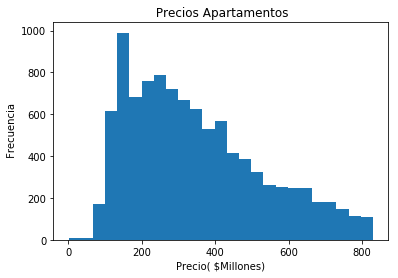

In [27]:
plt.hist(   df_apt["FormatedPrice"][:10000]/1e6 , bins = 25 )
plt.title(" Precios Apartamentos")
plt.xlabel( "Precio( $Millones)" )
plt.ylabel(" Frecuencia")
plt.savefig("../data/hist_apts.png")
plt.show()

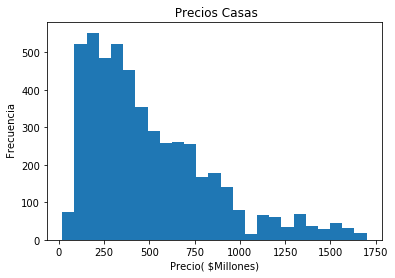

In [28]:
plt.hist(   df_house["FormatedPrice"][:5000]/1e6 , bins = 25 )
plt.title(" Precios Casas")
plt.xlabel( "Precio( $Millones)" )
plt.ylabel(" Frecuencia")
plt.savefig("../data/hist_hs.png")
plt.show()

In [29]:
df_house.shape

(5249, 99)

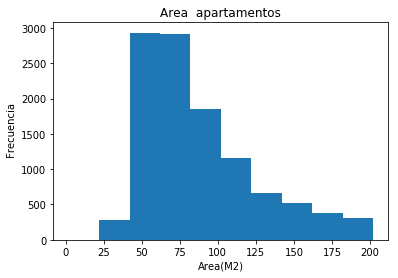

In [30]:
plt.hist( df_apt["Area"].sort_values( )[:11000] ,   )
plt.title("Area  apartamentos")
plt.xlabel( "Area(M2)" )
plt.ylabel(" Frecuencia")
plt.savefig("../data/hist_area_apts.png")
plt.show()

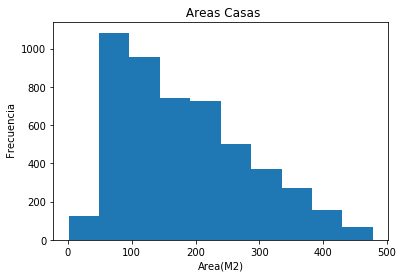

In [31]:
plt.hist( df_house["Area"].sort_values( )[:5000] ,   )
plt.title(" Areas Casas")
plt.xlabel( "Area(M2)" )
plt.ylabel(" Frecuencia")
plt.savefig("../data/hist_area_hs.png")
plt.show()

In [32]:
df_apt["Area"].head()

0     68
1     60
2    259
3    175
4    429
Name: Area, dtype: int64

In [33]:
x_inx = df_apt["FormatedPrice"]/1e6 < 700
y_inx = df_apt["Area"] < 1000
x_apt = df_apt["FormatedPrice"][ x_inx & y_inx]/1e6
y_apt = df_apt["Area"][ x_inx & y_inx]

x_inx = df_house["FormatedPrice"]/1e6 < 2000
y_inx = df_house["Area"] < 1000
x_hs = df_house["FormatedPrice"][ x_inx & y_inx]/1e6
y_hs = df_house["Area"][ x_inx & y_inx]





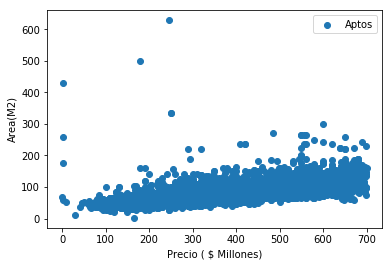

In [34]:
plt.scatter( x_apt , y_apt , label = "Aptos"   )
#plt.scatter( x_hs , y_hs  , label = "Casas" , alpha = 0.6)
plt.legend()
plt.xlabel("Precio ( $ Millones)")
plt.ylabel("Area(M2)")
plt.savefig("../data/precio_area_apts.png")
plt.show()

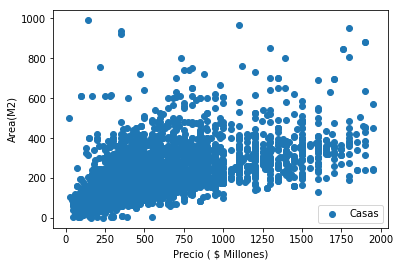

In [35]:
plt.scatter( x_hs , y_hs , label = "Casas"   )
#plt.scatter( x_hs , y_hs  , label = "Casas" , alpha = 0.6)
plt.legend()
plt.xlabel("Precio ( $ Millones)")
plt.ylabel("Area(M2)")
plt.savefig("../data/precio_area_hs.png")
plt.show()

In [36]:
df_apt.shape

(11857, 99)

In [37]:
df_apt["Location3"].value_counts()

 Norte           4994
 Noroccidente    2831
 Occidente       2050
 Sur              800
 Chapinero        529
                  446
 Centro           207
Name: Location3, dtype: int64

In [38]:
#df_apt["Neighborhood"].value_counts()

In [39]:

df_apt["Ages"].value_counts()

1 a 8 años        3840
16 a 30 años      3001
9 a 15 años       2260
                  1392
Menos de 1 año     800
Más de 30 años     564
Name: Ages, dtype: int64

In [40]:
df_apt_r = df_apt[ df_apt["FormatedPrice"]/1e6 < 1000 ]
gp_apt = df_apt_r.groupby(  by = [ "Location3" ] )["FormatedPrice"].mean().reset_index()

df_apt_r = df_house[ df_house["FormatedPrice"]/1e6 < 3000 ]
gp_hs = df_apt_r.groupby(  by = [ "Location3" ] )["FormatedPrice"].mean().reset_index()


In [41]:
gp_apt

,Location3,FormatedPrice
0,,3.415796e+08
1,Centro,3.764222e+08
2,Chapinero,4.329256e+08
3,Noroccidente,3.350443e+08
4,Norte,5.011877e+08
5,Occidente,2.837593e+08
6,Sur,1.443058e+08


In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

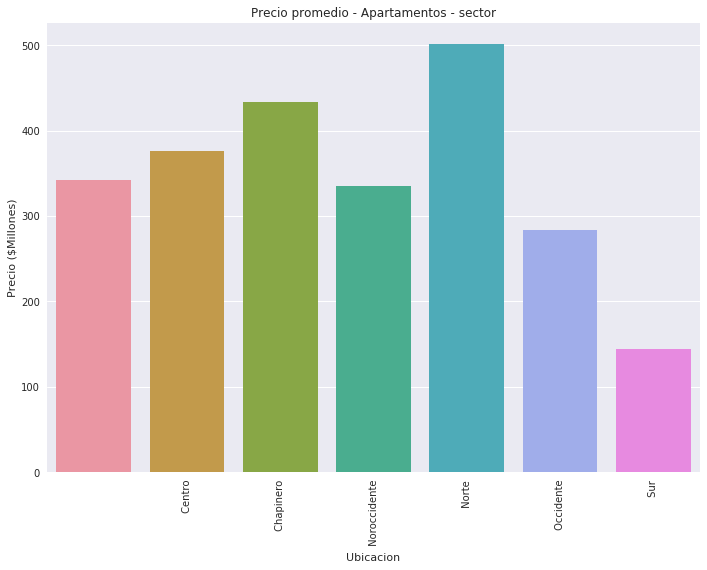

In [43]:
gp_apt["FormatedPrice"] = gp_apt["FormatedPrice"]/1e6
data = gp_apt[ ["Location3" , "FormatedPrice"]]
ax = sns.barplot( x = "Location3" , y = "FormatedPrice" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

a4_dims = (11.7, 8.27)
plt.title("Precio promedio - Apartamentos - sector")
plt.xlabel("Ubicacion")
plt.ylabel( "Precio ($Millones)" )
#plt.figure(figsize=(20,15))
plt.savefig("../data/precio_apts_sector.png")

plt.show()

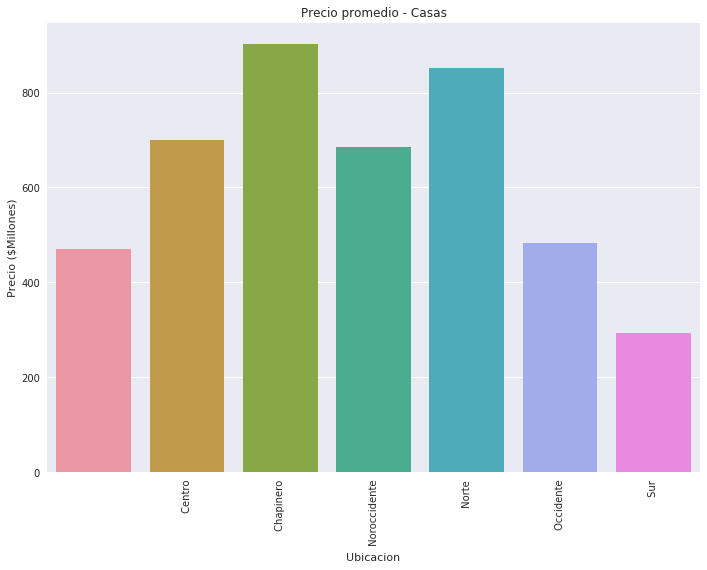

In [44]:

gp_hs["FormatedPrice"] = gp_hs["FormatedPrice"]/1e6
data = gp_hs[ ["Location3" , "FormatedPrice"]]
ax = sns.barplot( x = "Location3" , y = "FormatedPrice" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

a4_dims = (11.7, 8.27)
plt.title("Precio promedio - Casas")
plt.xlabel("Ubicacion")
plt.ylabel( "Precio ($Millones)" )
#plt.figure(figsize=(20,15))
plt.savefig("../data/precio_hs_sector.png")
plt.show()

In [45]:
df_apt_r = df_apt[ df_apt["Area"] < 1000 ]
gp_apt = df_apt_r.groupby(  by = [ "Location3" ] )["Area"].mean().reset_index()

df_apt_r = df_house[ df_house["Area"] < 3000 ]
gp_hs = df_apt_r.groupby(  by = [ "Location3" ] )["Area"].mean().reset_index()

In [46]:
gp_hs.head()

,Location3,Area
0,,191.644550
1,Centro,285.026549
2,Chapinero,307.686391
3,Noroccidente,207.867657
4,Norte,244.179487


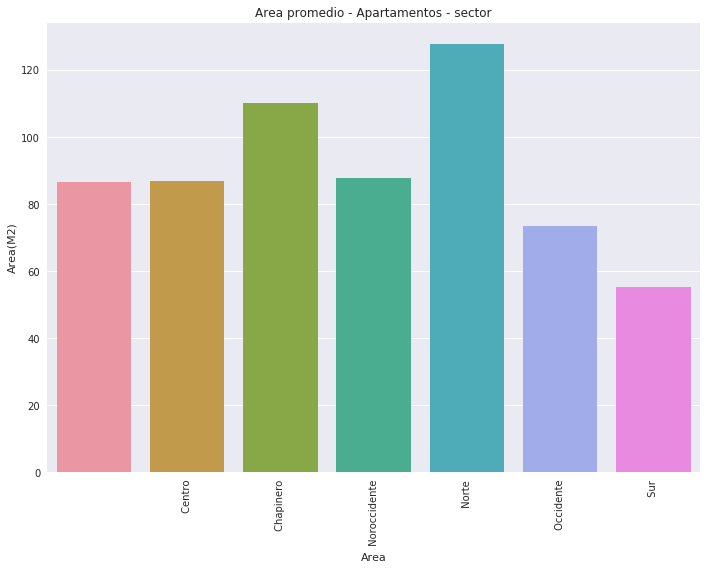

In [47]:

data = gp_apt[ ["Location3" , "Area"]]
ax = sns.barplot( x = "Location3" , y = "Area" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

a4_dims = (11.7, 8.27)
plt.title("Area promedio - Apartamentos - sector")
plt.xlabel("Area")
plt.ylabel( "Area(M2)" )
#plt.figure(figsize=(20,15))
plt.show()

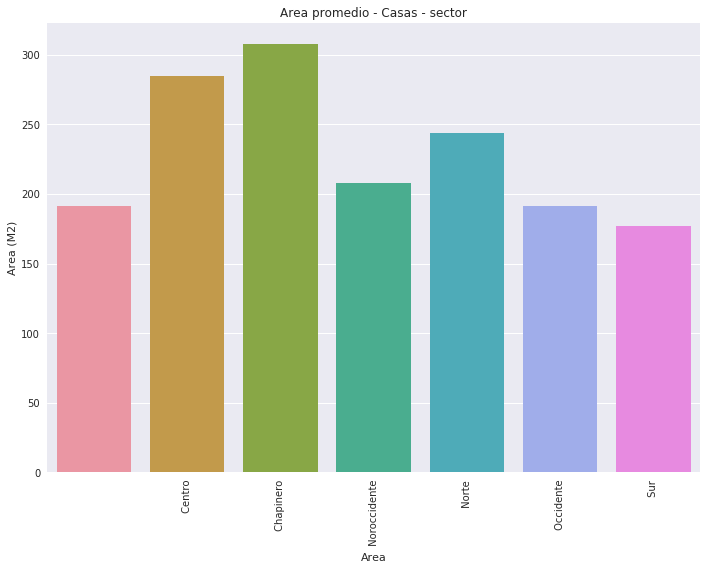

In [48]:
data = gp_hs[ ["Location3" , "Area"]]
ax = sns.barplot( x = "Location3" , y = "Area" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.title("Area promedio - Casas - sector")
plt.xlabel("Area")
plt.ylabel( "Area (M2)" )
#plt.figure(figsize=(20,15))
plt.show()

In [49]:
df_apt_r = df_apt[ df_apt["FormatedPrice"]/1e6 < 1000 ]
gp_apt = df_apt_r.groupby(  by = [ "Location3" ] )["Area","Baths"].sum().reset_index()

df_apt_r = df_house[ df_house["FormatedPrice"]/1e6 < 3000 ]
gp_hs = df_apt_r.groupby(  by = [ "Location3" ] )["Area" , "Baths"].sum().reset_index()



In [50]:
gp_hs.head()

,Location3,Area,Baths
0,,45239,626
1,Centro,28881,457
2,Chapinero,97977,644
3,Noroccidente,340973,4829
4,Norte,126327,2125


In [51]:
gp_apt["B/A"] = gp_apt["Baths"]/gp_apt["Area"]
gp_hs["B/A"] = gp_hs["Baths"]/gp_hs["Area"]

In [52]:
gp_hs.head()

,Location3,Area,Baths,B/A
0,,45239,626,0.013838
1,Centro,28881,457,0.015824
2,Chapinero,97977,644,0.006573
3,Noroccidente,340973,4829,0.014162
4,Norte,126327,2125,0.016821


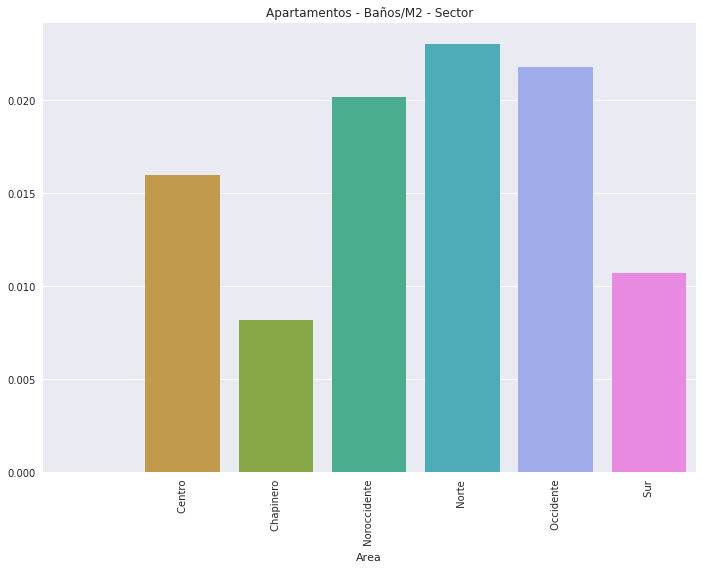

In [53]:
data = gp_apt[ ["Location3" , "B/A"]]
ax = sns.barplot( x = "Location3" , y = "B/A" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

a4_dims = (11.7, 8.27)
plt.title("Apartamentos - Baños/M2 - Sector")
plt.xlabel("Area")
plt.ylabel( "" )
#plt.figure(figsize=(20,15))
plt.savefig("../data/baths_apts.png")
plt.show()



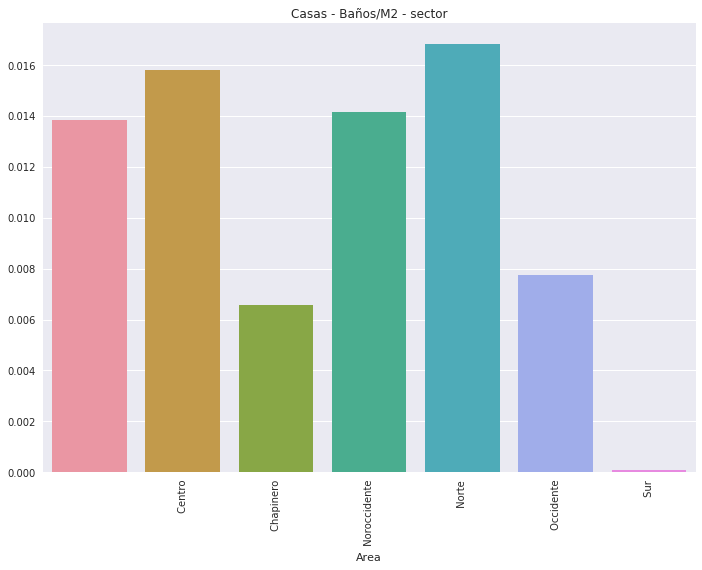

In [54]:
data = gp_hs[ ["Location3" , "B/A"]]
ax = sns.barplot( x = "Location3" , y = "B/A" , data = data )  
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

a4_dims = (11.7, 8.27)
plt.title("Casas - Baños/M2 - sector")
plt.xlabel("Area")
plt.ylabel( "" )
#plt.figure(figsize=(20,15))

plt.savefig("../data/baths_hs.png")
plt.show()


In [55]:

gp_apt = df_apt.groupby( ["Latitude" , "Longitude"] )["FormatedPrice"].mean().reset_index()
gp_hs = df_house.groupby( ["Latitude" , "Longitude"] )["FormatedPrice"].mean().reset_index()


gp_apt = gp_apt[ gp_apt["FormatedPrice"]/1e6 < 2000 ]
gp_hs = gp_hs[ gp_hs["FormatedPrice"]/1e6 < 2000 ]

In [56]:
gp_apt = gp_apt.sort_values( by = "Latitude" , ascending = False )

In [57]:
gp_apt = gp_apt[1:]
gp_apt.head()
gp_apt = gp_apt.sort_values( by = "Longitude" , ascending = False )

gp_apt = gp_apt[ gp_apt["Latitude"] != 0 ]
gp_apt = gp_apt[ gp_apt["Longitude"] != 0 ]

In [58]:
gp_apt["Longitude"].min()

-82.4720916748047

In [59]:
gp_hs = gp_hs.sort_values( by = "Longitude" , ascending = True )

In [60]:
M = 30
mx =  gp_apt["FormatedPrice"].max()
gp_apt.loc[: , "Size" ] = gp_apt["FormatedPrice"].apply( lambda x: (x/mx)*M  )


In [61]:
mx =  gp_hs["FormatedPrice"].max()
gp_hs.loc[: , "Size" ] = gp_hs["FormatedPrice"].apply( lambda x: (x/mx)*M  )

In [62]:
gp_hs.head()

,Latitude,Longitude,FormatedPrice,Size
43,4.502928,-434.115814,3.900000e+08,6.000000
3543,33.407246,-82.655212,1.050000e+09,16.153846
3542,12.888666,-77.339371,2.000000e+08,3.076923
3544,33.782001,-76.504997,9.000000e+08,13.846154
14,4.344533,-74.375801,2.900000e+08,4.461538


In [63]:
gp_apt.head()

,Latitude,Longitude,FormatedPrice,Size
6295,4.728440,74.065933,240000000.0,3.618090
0,-74.081528,4.713888,895000000.0,13.492462
1,-74.053551,4.701489,495000000.0,7.462312
5,-0.005973,0.002002,140000000.0,2.110553
4,-0.012858,-0.001464,270000000.0,4.070352


In [64]:

data = [ dict(
    lat = gp_apt['Latitude'],
    lon = gp_apt['Longitude'],
    text =  "$ " + (gp_apt['FormatedPrice']/1e6).astype(str) +  "M"  ,
    marker = dict(
        opacity = 1.0,
        size = gp_apt["Size"],
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "#D6EFD6",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'Mercator',
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -75, -73.0 ],
            dtick = 5 , 
        
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 4.4, 4.9 ],
            dtick = 5 , 
           
        ) , 
 
    ),
    title = 'Precios Aptos Bogota',
)
fig = { 'data':data, 'layout':layout }
#py.iplot(fig, filename='precipitation')
#iplot( fig )
py.plot( fig , filename = "AptsBogota.html")

'https://plot.ly/~afhuertass/217'

In [86]:
feats = [ "Ages" , "Area" , "Baths" , "Condition"  , "Floor" , "Garages" , "Location3" , "Stratum" , "Rooms" , "FormatedPrice" ]


In [87]:
df_apts = df_apt[ feats ]
df_hs = df_house[feats]

In [88]:
df_apts.head()

,Ages,Area,Baths,Condition,Floor,Garages,Location3,Stratum,Rooms,FormatedPrice
0,1 a 8 años,68,2,Excelente,4º,2,Norte,5,1,430000.0
1,16 a 30 años,60,1,Bueno,5º,1,Occidente,3,3,950000.0
2,16 a 30 años,259,5,Bueno,,3,Norte,6,4,1190000.0
3,1 a 8 años,175,5,Excelente,2º,2,Norte,6,3,1700000.0
4,Más de 30 años,429,4,Bueno,,3,Chapinero,6,3,2872000.0


In [84]:
df_hs.head()

,Ages,Area,Baths,Condition,Floor,Garages,Location3,Stratum,Rooms,FormatedPrice,InteriorFloors
6,16 a 30 años,500,3,,,2,,6,6,19000000.0,0
7,Menos de 1 año,108,3,Excelente,3º,1,Occidente,3,3,30000000.0,0
10,9 a 15 años,90,2,,,,Sur,1,4,40000000.0,0
13,9 a 15 años,72,1,Bueno,1º,,Sur,1,4,47000000.0,0
14,1 a 8 años,62,1,,,,Sur,1,3,47000000.0,0


In [85]:
df_hs["InteriorFloors"].value_counts()

0    5239
3       3
2       3
5       3
4       1
Name: InteriorFloors, dtype: int64

In [69]:
df_apts = df_apts[ df_apts["Location3"] != "" ]
df_apts = df_apts[ df_apts["Ages"] != "" ]
df_apts.head()

,Ages,Area,Baths,Condition,Floor,Garages,Location3,Stratum,Rooms,FormatedPrice
0,1 a 8 años,68,2,Excelente,4º,2,Norte,5,1,430000.0
1,16 a 30 años,60,1,Bueno,5º,1,Occidente,3,3,950000.0
2,16 a 30 años,259,5,Bueno,,3,Norte,6,4,1190000.0
3,1 a 8 años,175,5,Excelente,2º,2,Norte,6,3,1700000.0
4,Más de 30 años,429,4,Bueno,,3,Chapinero,6,3,2872000.0


In [70]:
df_hs = df_hs[ df_hs["Location3"] != "" ]
df_hs = df_hs[ df_hs["Ages"] != "" ]
df_hs.head()

,Ages,Area,Baths,Condition,Floor,Garages,Location3,Stratum,Rooms,FormatedPrice
7,Menos de 1 año,108,3,Excelente,3º,1,Occidente,3,3,30000000.0
10,9 a 15 años,90,2,,,,Sur,1,4,40000000.0
13,9 a 15 años,72,1,Bueno,1º,,Sur,1,4,47000000.0
14,1 a 8 años,62,1,,,,Sur,1,3,47000000.0
16,9 a 15 años,77,1,,,,Sur,1,4,50000000.0


In [71]:
df_hs.shape

(4240, 10)

In [72]:
df_apts.shape

(10235, 10)

In [73]:
df_hs.to_csv("../data/casas.csv")

In [74]:
df_apts.to_csv("../data/apts.csv")

In [75]:
from sklearn import preprocessing

In [76]:
le = preprocessing.LabelEncoder()

In [77]:
le

LabelEncoder()

In [78]:
def prepare( df ):
    
    le = preprocessing.LabelEncoder()
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    df["Ages"] = le.fit_transform( df["Ages"] )
    df1 = pd.get_dummies( df["Ages"] )
    
    
    le = preprocessing.LabelEncoder()
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    df["Condition"] = le.fit_transform( df["Condition"] )
    df2 = pd.get_dummies( df["Condition"] )
    
    le = preprocessing.LabelEncoder()
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    df["Location3"] = le.fit_transform( df["Location3"] )
    df3 = pd.get_dummies( df["Location3"])
    
    
    le = preprocessing.LabelEncoder()
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    df["FloorId"] = le.fit_transform( df["FloorId"] )
    df4 = pd.get_dummies( df["FloorId"])
    
    
    le = preprocessing.LabelEncoder()
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    df["Stratum"] = le.fit_transform( df["Stratum"] )
    df5 = pd.get_dummies( df["Stratum"])
    
    
    ls = [ df1 , df2 , df3 , df4 , df5 , df["Area"] , df["Baths"]  , df["Rooms"] ]
    
    X = pd.concat( ls , axis = 1 )
    y = np.log( df["FormatedPrice"]/1e6 )
    
    return X.values , y.values


In [79]:
X , y = prepare( df_hs )

KeyError: 'FloorId'

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.8
num_boost_round = 1000
params = {"objective": "regression",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "metric":["mse"] , 
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9 , 
}

In [ ]:
y

In [ ]:
NFOLDS = 5
kfold = KFold(n_splits=NFOLDS, shuffle=True, random_state=218)


final_cv_train = np.zeros(len(y))
x_score = []

for s in range(16):
    cv_train = np.zeros(len(y))
    params['seed'] = s
    
    if True:
        kf = kfold.split( X ,   y )

        best_trees = []
        fold_scores = []
        
        for i, (train_fold, validate) in enumerate(kf):
            X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], y[train_fold], y[validate]
            dtrain = lgb.Dataset(X_train, label_train )
            dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain )
            bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)
            best_trees.append(bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)
            
            
            score = mean_squared_error( label_validate, cv_train[validate] )
            print( score )
            fold_scores.append(score)

        final_cv_train += cv_train

        print("cv score:")
        print( mean_squared_error(y, cv_train))
        print( "current score:", mean_squared_error( y , final_cv_train / (s + 1.)), s+1)
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(mean_squared_error( y , cv_train))